In [101]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Data Cleaning

In [102]:
house = pd.read_csv("/content/raw_house_data - raw_house_data.csv")  

In [103]:
house.head(5)

,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,kitchen_features,fireplaces,floor_covering,HOA
0,21530491,5300000.0,85637,-110.378200,31.356362,2154.00,5272.00,1941,13,10,10500,0,"Dishwasher, Freezer, Refrigerator, Oven",6.0,"Mexican Tile, Wood",0
1,21529082,4200000.0,85646,-111.045371,31.594213,1707.00,10422.36,1997,2,2,7300,0,"Dishwasher, Garbage Disposal",5.0,"Natural Stone, Other",0
2,3054672,4200000.0,85646,-111.040707,31.594844,1707.00,10482.00,1997,2,3,None,None,"Dishwasher, Garbage Disposal, Refrigerator",5.0,"Natural Stone, Other: Rock",None
3,21919321,4500000.0,85646,-111.035925,31.645878,636.67,8418.58,1930,7,5,9019,4,"Dishwasher, Double Sink, Pantry: Butler, Refri...",4.0,"Ceramic Tile, Laminate, Wood",None
4,21306357,3411450.0,85750,-110.813768,32.285162,3.21,15393.00,1995,4,6,6396,3,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",5.0,"Carpet, Concrete",55


In [104]:
house.dtypes

MLS                   int64
sold_price          float64
zipcode               int64
longitude           float64
latitude            float64
lot_acres           float64
taxes               float64
year_built            int64
bedrooms              int64
bathrooms            object
sqrt_ft              object
garage               object
kitchen_features     object
fireplaces          float64
floor_covering       object
HOA                  object
dtype: object

In [105]:
house.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
MLS,5000.0,21270699.22,2398507.68,3042851.00,21407176.50,21614686.50,21804801.75,21928565.00
sold_price,5000.0,774626.20,318555.61,169000.00,585000.00,675000.00,835000.00,5300000.00
zipcode,5000.0,85723.03,38.06,85118.00,85718.00,85737.00,85749.00,86323.00
longitude,5000.0,-110.91,0.12,-112.52,-110.98,-110.92,-110.86,-109.45
latitude,5000.0,32.31,0.18,31.36,32.28,32.32,32.39,34.93
lot_acres,4990.0,4.66,51.69,0.00,0.58,0.99,1.76,2154.00
taxes,5000.0,9402.83,172938.53,0.00,4803.61,6223.76,8082.83,12215075.00
year_built,5000.0,1992.33,65.49,0.00,1987.00,1999.00,2006.00,2019.00
bedrooms,5000.0,3.93,1.25,1.00,3.00,4.00,4.00,36.00
fireplaces,4975.0,1.89,1.14,0.00,1.00,2.00,3.00,9.00


In [106]:
print(house.shape)
print(house.columns)
print(house.isna().sum())

(5000, 16)
Index(['MLS', 'sold_price', 'zipcode', 'longitude', 'latitude', 'lot_acres',
       'taxes', 'year_built', 'bedrooms', 'bathrooms', 'sqrt_ft', 'garage',
       'kitchen_features', 'fireplaces', 'floor_covering', 'HOA'],
      dtype='object')
MLS                  0
sold_price           0
zipcode              0
longitude            0
latitude             0
lot_acres           10
taxes                0
year_built           0
bedrooms             0
bathrooms            0
sqrt_ft              0
garage               0
kitchen_features     0
fireplaces          25
floor_covering       0
HOA                  0
dtype: int64


## Drop NA's

In [107]:
house = house.dropna()
print(house.isna().sum())
print(house.shape)

MLS                 0
sold_price          0
zipcode             0
longitude           0
latitude            0
lot_acres           0
taxes               0
year_built          0
bedrooms            0
bathrooms           0
sqrt_ft             0
garage              0
kitchen_features    0
fireplaces          0
floor_covering      0
HOA                 0
dtype: int64
(4973, 16)


In [108]:
house['HOA'].value_counts().sort_index()[-1:]

None    556
Name: HOA, dtype: int64

In [109]:
house['HOA'].unique()

array(['0', 'None', '55', '422', '220', '421', '141.67', '357', '148',
       '20,000', '142', '173', '167', '123', '300', '194', '1,717', '342',
       '240', '437', '112', '199', '178', '550', '258', '188', '169',
       '124', '320', '213', '153', '105', '159', '193', '69', '208', '50',
       '168', '191', '79', '157', '323', '1,100', '250', '158', '127',
       '149', '83', '118', '219', '88', '180', '259', '128', '117', '48',
       '130', '132', '135', '152', '33', '143', '5', '157.33', '129',
       '171', '273', '162', '131', '134', '211', '203', '190', '145',
       '83.33', '63', '177.34', '57', '115', '166', '184', '164', '125',
       '216', '195', '106', '214', '238', '212.88', '4', '30', '150',
       '19', '160', '138', '141', '146', '1,270', '15', '95', '19,480',
       '116', '311', '94', '21', '295', '57.33', '243', '23', '34', '215',
       '41', '18', '110', '233', '322', '43', '232', '100', '133', '4.16',
       '202', '700', '121', '40', '51', '179', '58', '102',

In [110]:
house['HOA'] = house['HOA'].str.replace(',', '')
mean_HOA = house['HOA'].loc[house['HOA'] != 'None']
mean_HOA = mean_HOA.astype(float).mean().round(2)
house['HOA'] = house['HOA'].replace('None', mean_HOA)
#house['HOA'] = house.HOA.fillna(value=np.nan, inplace=True)
#house['HOA'] = house['HOA'].astype(str).astype(float)
#mean_HOA = house['HOA'].mean()
#house['HOA'] = house['HOA'].fillna(mean_HOA, inplace=True)

In [111]:
print(house['HOA'].shape)
print(house['HOA'].unique())
house['HOA']

(4973,)
['0' 102.32 '55' '422' '220' '421' '141.67' '357' '148' '20000' '142'
 '173' '167' '123' '300' '194' '1717' '342' '240' '437' '112' '199' '178'
 '550' '258' '188' '169' '124' '320' '213' '153' '105' '159' '193' '69'
 '208' '50' '168' '191' '79' '157' '323' '1100' '250' '158' '127' '149'
 '83' '118' '219' '88' '180' '259' '128' '117' '48' '130' '132' '135'
 '152' '33' '143' '5' '157.33' '129' '171' '273' '162' '131' '134' '211'
 '203' '190' '145' '83.33' '63' '177.34' '57' '115' '166' '184' '164'
 '125' '216' '195' '106' '214' '238' '212.88' '4' '30' '150' '19' '160'
 '138' '141' '146' '1270' '15' '95' '19480' '116' '311' '94' '21' '295'
 '57.33' '243' '23' '34' '215' '41' '18' '110' '233' '322' '43' '232'
 '100' '133' '4.16' '202' '700' '121' '40' '51' '179' '58' '102' '175'
 '97' '25' '139' '120' '137' '53' '2000' '242' '49.43' '333' '270' '84'
 '8' '165' '506' '63.98' '35' '64' '258.08' '108' '187' '186' '1600' '212'
 '12' '209' '107' '45' '52' '42' '145.83' '22' '96' '93' '1

0            0
1            0
2       102.32
3       102.32
4           55
         ...  
4995    102.32
4996        43
4997    102.32
4998    102.32
4999    102.32
Name: HOA, Length: 4973, dtype: object

In [112]:
print(house.shape)
house = house.replace(to_replace='None', value=np.nan)
print(house.isna().sum())
house = house.dropna()
print(house.shape)

(4973, 16)
MLS                  0
sold_price           0
zipcode              0
longitude            0
latitude             0
lot_acres            0
taxes                0
year_built           0
bedrooms             0
bathrooms            0
sqrt_ft             29
garage               7
kitchen_features    32
fireplaces           0
floor_covering       0
HOA                  0
dtype: int64
(4908, 16)


In [113]:
#house['HOA'].fillna((house['HOA'].mean()), inplace=True)
#print(house.isna().sum())
#house = house.dropna()
#print(house.shape)

In [114]:
house.max()

<ipython-input-114-efe1613af233>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  house.max()


MLS                                    21928565
sold_price                            5300000.0
zipcode                                   86323
longitude                           -109.454637
latitude                              34.927884
lot_acres                                2154.0
taxes                                12215075.0
year_built                                 2019
bedrooms                                     36
bathrooms                                     9
sqrt_ft                                    9858
garage                                        9
kitchen_features                        Wet Bar
fireplaces                                  9.0
floor_covering      Wood, Other: porcelain tile
dtype: object

In [115]:
house.min()

<ipython-input-115-865a59f4e435>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  house.min()


MLS                                                           4110917
sold_price                                                   300000.0
zipcode                                                         85118
longitude                                                 -112.520168
latitude                                                    31.356362
lot_acres                                                         0.0
taxes                                                             0.0
year_built                                                          0
bedrooms                                                            1
bathrooms                                                           1
sqrt_ft                                                         10258
garage                                                              0
kitchen_features    # of Ovens: 1, Dishwasher, Freezer, Garbage Di...
fireplaces                                                        0.0
floor_covering      

<Axes: >

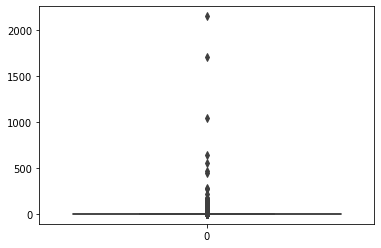

In [116]:
sns.boxplot(house['lot_acres'])

<Axes: >

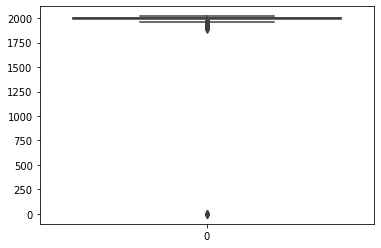

In [117]:
sns.boxplot(house['year_built'])

In [118]:
print(house.shape)
house = house.loc[house['year_built'] != 0]
print(house.shape)
house = house.loc[house['lot_acres'] != 0]
print(house.shape)

(4908, 16)
(4903, 16)
(4868, 16)


<Axes: >

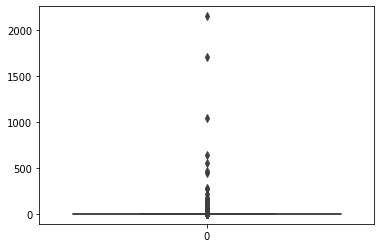

In [119]:
sns.boxplot(house['lot_acres'])

<Axes: >

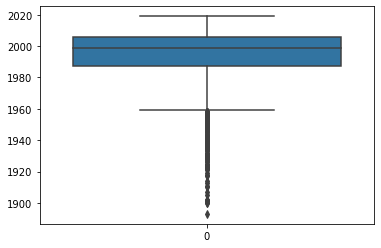

In [120]:
sns.boxplot(house['year_built'])

In [121]:
house.max()

<ipython-input-121-efe1613af233>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  house.max()


MLS                                    21928565
sold_price                            5300000.0
zipcode                                   86323
longitude                           -109.454637
latitude                              34.927884
lot_acres                                2154.0
taxes                                12215075.0
year_built                                 2019
bedrooms                                     36
bathrooms                                     9
sqrt_ft                                    9858
garage                                        9
kitchen_features                        Wet Bar
fireplaces                                  9.0
floor_covering      Wood, Other: porcelain tile
dtype: object

In [122]:
house.min()

<ipython-input-122-865a59f4e435>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  house.min()


MLS                                                           4110917
sold_price                                                   300000.0
zipcode                                                         85118
longitude                                                 -112.520168
latitude                                                    31.356362
lot_acres                                                        0.02
taxes                                                             0.0
year_built                                                       1893
bedrooms                                                            1
bathrooms                                                           1
sqrt_ft                                                         10258
garage                                                              0
kitchen_features    # of Ovens: 1, Dishwasher, Freezer, Garbage Di...
fireplaces                                                        0.0
floor_covering      

In [123]:
house.sort_values(by=['lot_acres']).head(10)

,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,kitchen_features,fireplaces,floor_covering,HOA
3399,21819891,580000.0,85712,-110.888518,32.262718,0.02,5151.00,2001,2,3,2348,2,"Dishwasher, Garbage Disposal, Gas Range, Islan...",2.0,Concrete,95
2138,21902353,728400.0,85755,-110.985712,32.467526,0.02,1644.23,2019,3,3,1942,2,"Dishwasher, Garbage Disposal, Gas Range, Islan...",1.0,"Carpet, Ceramic Tile",213
4534,21830062,571650.0,85745,-110.985754,32.218193,0.03,3186.79,2011,3,2,2024,0,"Dishwasher, Garbage Disposal, Gas Range, Pantr...",0.0,"Concrete, Mexican Tile",99
1572,21719453,799000.0,85715,-110.846450,32.260804,0.04,7295.74,1980,5,4,3417,2,"Dishwasher, Garbage Disposal, Refrigerator",3.0,Natural Stone,144
2011,21814433,737000.0,85745,-110.986717,32.218715,0.04,503.92,2017,3,3,2130,1,"Dishwasher, Freezer, Garbage Disposal, Gas Ran...",0.0,"Concrete, Wood",99
4880,21523997,550000.0,85745,-110.986033,32.219063,0.05,3957.42,2011,2,3,1690,2,"Dishwasher, Garbage Disposal, Refrigerator, Oven",1.0,"Concrete, Mexican Tile",99
4954,21801191,550000.0,85745,-110.986109,32.219053,0.05,4812.81,2007,3,2,1957,2,"Dishwasher, Double Sink, Garbage Disposal, Gas...",0.0,"Concrete, Mexican Tile",99
2770,21913717,670000.0,85745,-110.986109,32.219053,0.05,5043.10,2007,3,2,1957,2,"Dishwasher, Garbage Disposal, Gas Range, Pantr...",0.0,"Ceramic Tile, Concrete",99
2549,21819461,680000.0,85745,-110.986032,32.219062,0.05,4445.66,2011,2,3,1690,2,"Dishwasher, Gas Range, Pantry: Cabinet, Refrig...",1.0,"Concrete, Mexican Tile",99
4380,21330543,575000.0,85745,-110.985809,32.218848,0.06,682.00,2013,3,3,2300,2,"Refrigerator, Microwave, Oven",0.0,"Concrete, Wood",99


In [124]:
house.head(10)

,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,kitchen_features,fireplaces,floor_covering,HOA
0,21530491,5300000.0,85637,-110.378200,31.356362,2154.00,5272.00,1941,13,10,10500,0,"Dishwasher, Freezer, Refrigerator, Oven",6.0,"Mexican Tile, Wood",0
1,21529082,4200000.0,85646,-111.045371,31.594213,1707.00,10422.36,1997,2,2,7300,0,"Dishwasher, Garbage Disposal",5.0,"Natural Stone, Other",0
3,21919321,4500000.0,85646,-111.035925,31.645878,636.67,8418.58,1930,7,5,9019,4,"Dishwasher, Double Sink, Pantry: Butler, Refri...",4.0,"Ceramic Tile, Laminate, Wood",102.32
4,21306357,3411450.0,85750,-110.813768,32.285162,3.21,15393.00,1995,4,6,6396,3,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",5.0,"Carpet, Concrete",55
5,21528016,3250000.0,85718,-110.910593,32.339090,1.67,27802.84,1999,3,4,6842,3,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",5.0,"Natural Stone, Wood, Other",422
6,21610478,2400000.0,85712,-110.883315,32.261069,2.10,19038.42,2001,9,8,12025,4,"Dishwasher, Garbage Disposal, Oven",6.0,"Carpet, Natural Stone, Wood, Other",0
7,21211741,2500000.0,85750,-110.861002,32.331603,1.07,21646.00,2011,6,8,8921,4,"Compactor, Dishwasher, Freezer, Garbage Dispos...",5.0,"Carpet, Natural Stone, Wood",220
8,21324646,3700000.0,85718,-110.912156,32.343601,6.73,25094.39,2002,5,7,5238,3,"Compactor, Dishwasher, Freezer, Garbage Dispos...",1.0,"Carpet, Natural Stone, Wood, Other",421
9,21812010,3250000.0,85750,-110.837950,32.327575,3.53,18936.11,2007,5,6,6480,3,"Dishwasher, Double Sink, Electric Range, Freez...",2.0,"Carpet, Concrete",141.67
10,21900396,2776518.0,85640,-111.045441,31.562121,147.18,7330.36,1935,5,5,5067,5,"Freezer, Refrigerator, Appliance Color: Stainl...",5.0,"Concrete, Natural Stone, Wood",102.32


In [125]:
house.dtypes

MLS                   int64
sold_price          float64
zipcode               int64
longitude           float64
latitude            float64
lot_acres           float64
taxes               float64
year_built            int64
bedrooms              int64
bathrooms            object
sqrt_ft              object
garage               object
kitchen_features     object
fireplaces          float64
floor_covering       object
HOA                  object
dtype: object

In [126]:
house['bathrooms'].unique()

array(['10', '2', '5', '6', '4', '8', '7', '3', '4.5', '1', '9', '11',
       '18', '3.5', '35', '2.5', '36'], dtype=object)

In [127]:
house['bathrooms'] = house['bathrooms'].astype(float)
house['garage'] = house['garage'].astype(float)
house['HOA'] = house['HOA'].astype(float)
house['sold_price'] = house['sold_price'].astype(int)
house['sqrt_ft'] = house['sqrt_ft'].astype(float)
house['fireplaces'] = house['fireplaces'].astype(int)
house['sqrt_ft'] = house['sqrt_ft'].astype(int)

house['HOA'].loc[house.HOA > 0] = 1
house['HOA'] = house['HOA'].astype(int)

<ipython-input-127-9ca8996f8138>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house['HOA'].loc[house.HOA > 0] = 1


In [128]:
print(house.shape)
house = house.loc[house['bathrooms'] <= 35]
house = house.loc[house['bedrooms'] <= 35]
print(house.shape)

(4868, 16)
(4865, 16)


# Exploratory Data Analysis

In [129]:
house.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
MLS,4865.0,21495289.06,1318347.54,4110917.00,21411531.00,21618258.00,21805673.00,21928565.00
sold_price,4865.0,773817.67,310465.41,300000.00,585000.00,677900.00,837500.00,5300000.00
zipcode,4865.0,85724.37,36.70,85118.00,85718.00,85737.00,85750.00,86323.00
longitude,4865.0,-110.91,0.12,-112.52,-110.98,-110.92,-110.86,-109.45
latitude,4865.0,32.32,0.17,31.36,32.28,32.32,32.40,34.93
lot_acres,4865.0,4.19,46.11,0.02,0.59,0.99,1.73,2154.00
taxes,4865.0,9474.69,175319.37,0.00,4822.77,6251.06,8091.68,12215075.00
year_built,4865.0,1994.31,17.62,1893.00,1987.00,1999.00,2006.00,2019.00
bedrooms,4865.0,3.92,0.93,1.00,3.00,4.00,4.00,19.00
bathrooms,4865.0,3.80,1.04,1.00,3.00,4.00,4.00,18.00


<Axes: >

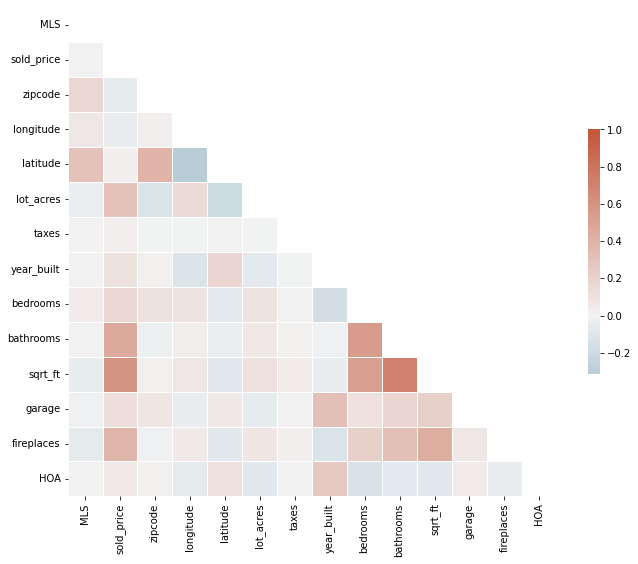

In [130]:
corr = house.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [131]:
#sns.pairplot(house)

In [132]:
# plt.figure(figsize=(10,6))
# plt.scatter(house['sold_price'], house['lot_acres'])
# #add axis labels
# plt.xlabel('Sold price')
# plt.ylabel('Lot Acres')

In [133]:
# fig, ax = plt.subplots(figsize=(10, 8))
# sns.lineplot(data=house, x="sold_price", y="bathrooms", ax=ax)

In [134]:
# fig, ax = plt.subplots(figsize=(10, 8))
# sns.lineplot(data=house, x="sold_price", y="fireplaces", ax=ax)

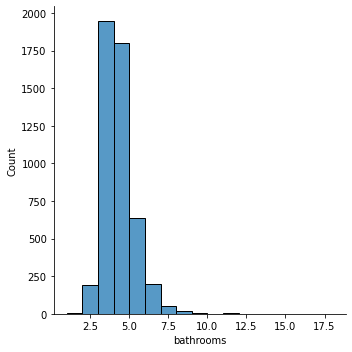

In [135]:
sns.displot(house, x="bathrooms", binwidth=1)

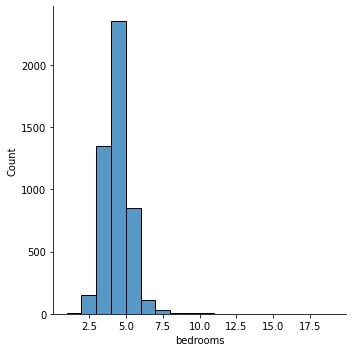

In [136]:
sns.displot(house, x="bedrooms", binwidth=1)

<Axes: xlabel='year_built', ylabel='Count'>

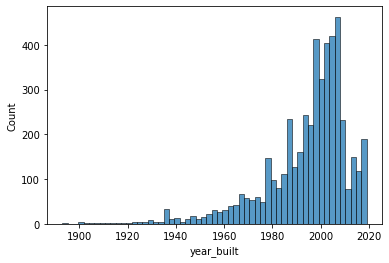

In [137]:
sns.histplot(data=house, x="year_built")

In [138]:
house['year_built'].value_counts().sort_index()[-20:]

2000    147
2001    177
2002    230
2003    175
2004    196
2005    225
2006    240
2007    223
2008    132
2009     67
2010     34
2011     33
2012     44
2013     67
2014     82
2015     56
2016     63
2017     80
2018     78
2019     32
Name: year_built, dtype: int64

In [139]:
house.head(5)

,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,kitchen_features,fireplaces,floor_covering,HOA
0,21530491,5300000,85637,-110.378200,31.356362,2154.00,5272.00,1941,13,10.0,10500,0.0,"Dishwasher, Freezer, Refrigerator, Oven",6,"Mexican Tile, Wood",0
1,21529082,4200000,85646,-111.045371,31.594213,1707.00,10422.36,1997,2,2.0,7300,0.0,"Dishwasher, Garbage Disposal",5,"Natural Stone, Other",0
3,21919321,4500000,85646,-111.035925,31.645878,636.67,8418.58,1930,7,5.0,9019,4.0,"Dishwasher, Double Sink, Pantry: Butler, Refri...",4,"Ceramic Tile, Laminate, Wood",1
4,21306357,3411450,85750,-110.813768,32.285162,3.21,15393.00,1995,4,6.0,6396,3.0,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",5,"Carpet, Concrete",1
5,21528016,3250000,85718,-110.910593,32.339090,1.67,27802.84,1999,3,4.0,6842,3.0,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",5,"Natural Stone, Wood, Other",1


In [140]:
house.shape

(4865, 16)

# Final Cleaning

In [141]:
house.dtypes

MLS                   int64
sold_price            int64
zipcode               int64
longitude           float64
latitude            float64
lot_acres           float64
taxes               float64
year_built            int64
bedrooms              int64
bathrooms           float64
sqrt_ft               int64
garage              float64
kitchen_features     object
fireplaces            int64
floor_covering       object
HOA                   int64
dtype: object

In [142]:
house['floor_covering'] = house['floor_covering'].str.count(',')+1
house['kitchen_features'] = house['kitchen_features'].str.count(',')+1

In [143]:
house['garage'].unique()

array([ 0. ,  4. ,  3. ,  5. ,  2. ,  6. , 15. ,  8. ,  7. ,  4.5,  3.5,
        2.5,  1. ,  9. , 22. , 30. , 12. , 10. , 11. , 20. , 13. ])

In [144]:
house

,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,kitchen_features,fireplaces,floor_covering,HOA
0,21530491,5300000,85637,-110.378200,31.356362,2154.00,5272.00,1941,13,10.0,10500,0.0,4,6,2,0
1,21529082,4200000,85646,-111.045371,31.594213,1707.00,10422.36,1997,2,2.0,7300,0.0,2,5,2,0
3,21919321,4500000,85646,-111.035925,31.645878,636.67,8418.58,1930,7,5.0,9019,4.0,4,4,3,1
4,21306357,3411450,85750,-110.813768,32.285162,3.21,15393.00,1995,4,6.0,6396,3.0,5,5,2,1
5,21528016,3250000,85718,-110.910593,32.339090,1.67,27802.84,1999,3,4.0,6842,3.0,5,5,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4994,21909379,535000,85718,-110.922291,32.317496,0.18,4414.00,2002,3,2.0,2106,2.0,10,1,1,1
4995,21810382,495000,85641,-110.661829,31.907917,4.98,2017.00,2005,5,3.0,3601,3.0,9,1,2,1
4996,21908591,550000,85750,-110.858556,32.316373,1.42,4822.01,1990,4,3.0,2318,3.0,10,1,2,1
4997,21832452,475000,85192,-110.755428,32.964708,12.06,1000.00,1969,3,2.0,1772,0.0,6,0,1,1


In [145]:
#sorted(house['sold_price'])

# KNN

Define a radius:
$radius(V_R) =\vert\vert x_{(k)} -x\vert\vert$

$\gamma_k = \frac{1}{\vert\vert x {(k)}-x\vert\vert = \epsilon}$

In [146]:
class KNNRegressor():

  def fit(self, X,y):
    self.X=X
    self.y=y

  def predict(self, X,K, epsilon = 1e-3):
    N = len(X)
    y_hat = np.zeros(N)

    for i in range(N):
      dist2 = np.sum((self.X - X[i])**2, axis=1)
      idxt = np.argsort(dist2)[:K]
      gamma_k = np.exp(-dist2[idxt])/np.exp(-dist2[idxt]).sum()
      y_hat[i] = gamma_k.dot(self.y[idxt])

    return y_hat

In [147]:
class KNNClassifier():

  def fit(self, X, y):
    self.X = X
    self.y = y


  def predict(self, X, K, epsilon = 1e-3):
    N = len(X)
    y_hat = np.zeros(N)

    for i in range(N):
      dist2 = np.sum((self.X-X[i])**2,axis=1)
      idxt  = np.argsort(dist2)[:K]
      gamma_k=1/(np.sqrt(dist2[idxt]+epsilon))
      y_hat[i] = np.bincount(self.y[idxt], weights=gamma_k).argmax()


    return y_hat

In [148]:
def accuracy(y, y_hat):
  return np.mean(y==y_hat)

In [149]:
knn = KNNClassifier()

In [150]:
#define function to calculate equal-frequency bins 
def equalObs(x, nbin):
    nlen = len(x)
    return np.interp(np.linspace(0, nlen, nbin + 1),
                     np.arange(nlen),
                     np.sort(x))

In [151]:
#Feature Engineering 
df_pps = pd.DataFrame(house['sold_price'] / house['sqrt_ft'], columns=['ppsqft'])

#remove everything not in $100-$800 range
df_pps =  df_pps.loc[df_pps["ppsqft"] >=100]
df_pps =  df_pps.loc[df_pps["ppsqft"] <=800]

#create bins
bins = equalObs(df_pps['ppsqft'],10)
labels = list(range(1,11))
df_pps.ppsqft = pd.cut(df_pps.ppsqft, bins=bins, labels=labels)

#create data to make classification
df_ppsqft = pd.DataFrame(house[['longitude','latitude']])
df_ppsqft = pd.concat([df_ppsqft, df_pps['ppsqft']], axis=1)
df_ppsqft['ppsqft'] = df_ppsqft.ppsqft.astype('category').cat.codes +1
df_ppsqft = df_ppsqft.reset_index(drop=True)
df_ppsqft

,longitude,latitude,ppsqft
0,-110.378200,31.356362,10
1,-111.045371,31.594213,10
2,-111.035925,31.645878,10
3,-110.813768,32.285162,10
4,-110.910593,32.339090,10
...,...,...,...
4860,-110.922291,32.317496,9
4861,-110.661829,31.907917,1
4862,-110.858556,32.316373,8
4863,-110.755428,32.964708,9


In [152]:
#split data
# Shuffle dataframe using sample function
df = df_ppsqft.sample(frac=1)
df

#normalize data
for column in df.iloc[:,:-1]:
    #data_2[column] = data_2[column]  / data_2[column].abs().max()
    df[column] = (df[column] - df[column].min()) / (df[column].max() - df[column].min())    
  
df

df = df.to_numpy()
#first shufle the dataset
np.random.shuffle(df)
num_test = int(len(df)*0.15)

#and the split for training and test, and also the target feature
X_test = df[0:num_test,:-1]
y_test = df[0:num_test,-1].astype(int)
X_train = df[num_test:,:-1]
y_train = df[num_test:,-1].astype(int)

#X_train

# # Select ratio
# ratio = 0.8

# total_rows = df.shape[0]
# train_size = int(total_rows*ratio)

# # Split data into test and train
# train = df[0:train_size]
# test = df[train_size:]

# #train and test
# X_train = train[['longitude', 'latitude']].to_numpy()
# y_train = train[['ppsqft']].to_numpy()
# y_train = y_train[:, 0]
# X_test = test[['longitude', 'latitude']].to_numpy()
# y_test = test[['ppsqft']].to_numpy()
# y_test = y_test[:, 0]
# y_test = np.float32(y_test)

#KNN fit
knn.fit(X_train,y_train)

#predict
for n in range(1,10):
  y_hat = knn.predict(X_train,n) #k=10
  print(n, accuracy(y_train, y_hat))

1 0.9941972920696325
2 0.9941972920696325
3 0.8602514506769826
4 0.7159090909090909
5 0.6141199226305609
6 0.526595744680851
7 0.47920696324951645
8 0.45478723404255317
9 0.4385880077369439


In [153]:
X = X_train.astype(int)

In [154]:
knn_model = KNNClassifier()
knn_model.fit(X_train, y_train)
k = 10
y_hat = knn_model.predict(X_train, k)
#get accuracy
accuracy(y_hat, y_train)

0.41997098646034814

In [155]:
# plt.figure()
# plt.scatter(X_train[:,0], X_train[:,1], c=y_hat, alpha= 0.5, s= 6)

#Feature Selection for regression

In [156]:
house.columns

Index(['MLS', 'sold_price', 'zipcode', 'longitude', 'latitude', 'lot_acres',
       'taxes', 'year_built', 'bedrooms', 'bathrooms', 'sqrt_ft', 'garage',
       'kitchen_features', 'fireplaces', 'floor_covering', 'HOA'],
      dtype='object')

In [157]:
#feature selection
reg_house = pd.DataFrame(house, columns=['sqrt_ft','bedrooms', 'bathrooms', 'year_built', 'kitchen_features','sold_price'])

In [158]:
reg_house['rooms'] = reg_house['bedrooms'] + reg_house['bathrooms']
reg_house['age'] = 2019 - reg_house['year_built']
reg_house['ppsqft'] = df_ppsqft['ppsqft']
#feature selection
lin_house = pd.DataFrame(reg_house, columns=['sqrt_ft','rooms', 'age', 'kitchen_features', 'ppsqft', 'sold_price'])
lin_house = lin_house.dropna().reset_index(drop=True)
#lin_house = lin_house.astype(int)

In [159]:
lin_house

,sqrt_ft,rooms,age,kitchen_features,ppsqft,sold_price
0,10500,23.0,78,4,10.0,5300000
1,7300,4.0,22,2,10.0,4200000
2,9019,12.0,89,4,10.0,4500000
3,6396,10.0,24,5,10.0,3411450
4,6842,7.0,20,5,5.0,3250000
...,...,...,...,...,...,...
4729,3185,6.0,35,5,5.0,495000
4730,3049,7.0,35,6,9.0,550000
4731,2247,5.0,28,5,1.0,525000
4732,2937,7.0,13,5,8.0,525000


<Axes: >

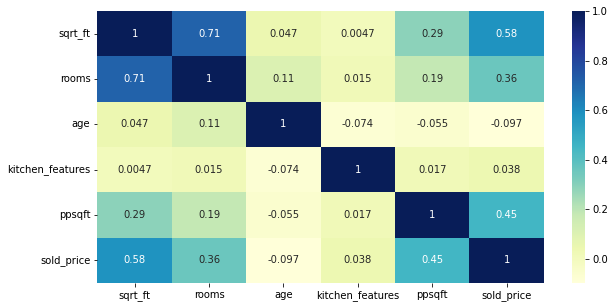

In [160]:
plt.figure(figsize=(10,5))
c = lin_house.corr()
sns.heatmap(c,cmap="YlGnBu",annot=True)

In [161]:
class LinearRegression():

  def fit(self,X,y):
    self.W = np.linalg.solve(X.T@X, X.T@y)

  def predict(self, X):
    return np.matmul(X, self.W)


In [162]:
def OLS(Y,Y_hat,N):
    return (1/(2*N)*np.sum((Y-Y_hat)**2))
def R2(Y,Y_hat):
    return (1-(np.sum((Y-Y_hat)**1)/np.sum((Y-np.mean(Y))**2)))

In [163]:
#def R2(Y,Y_hat):
 # return (1-(np.sum((Y-Y_hat)**1)/np.sum((Y-np.mean(Y))**2)))

In [164]:
class MVLinearRegression():
    
    def fit(self, X,y, eta = 1e-3, epochs =1e3, show_curve = False):
        epochs =int(epochs)
        N, D = X.shape
        Y =y

        #Initialize the weights
        self.W =np.random.randn(D)
    
        J = np.zeros(epochs)

        for epoch in range(epochs):
            Y_hat = self.predict(X)
            J[epoch] = OLS(Y, Y_hat, N)
            #weight update Rule:
            self.W -= eta*(1/N)*(X.T@(Y_hat-Y))

        if show_curve:
            plt.figure()
            plt.plot(J)
            plt.xlabel("epochs")
            plt.ylabel("")
            plt.title("Training Curve")
            plt.show()

    def predict(self,X):
        return X @ self.W

In [165]:
myReg = MVLinearRegression()

In [166]:
#convert to numpy array
X_lin = lin_house.to_numpy()
#split target feature
y_lin = X_lin[:,-1]
X_lin = X_lin[:,:-1]

In [167]:
np.set_printoptions(suppress=True)
X_lin[5]

array([12025.,    17.,    18.,     3.,    10.])

In [168]:
#split in train and test
#first shufle the dataset
num_test_reg = int(len(X_lin)*0.10)

#and the split for training and test, and also the target feature
X_test = X_lin[0:num_test_reg,:]
y_test = y_lin[0:num_test_reg]
X_train = X_lin[num_test_reg:,:]
y_train = y_lin[num_test_reg:]

y_test.shape

(473,)

In [169]:
X_train[1]

array([4795.,    9.,   11.,    5.,   10.])

In [170]:
myReg = MVLinearRegression()

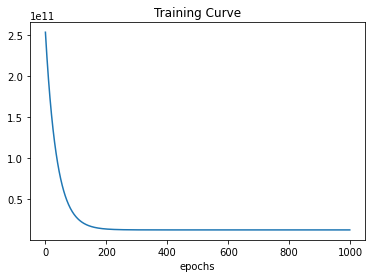

In [171]:
myReg.fit(X_train, y_train, epochs=1e3, eta=1e-9, show_curve=True)

In [172]:
XTest = np.array([[2000,5,33,5,4]])

In [173]:
y_hat = myReg.predict(X_test)

In [185]:
#using OLS and R2
N, D = X_test.shape
OLS(y_test, y_hat, N)

235526231784.23944

In [175]:
R2(y_test, y_hat)

0.9999974555308292

#Return Price Functions

In [176]:
from geopy import Nominatim
geolocator = Nominatim(user_agent='mAIstros')

In [177]:
def get_long_lat(xyz):
  location = geolocator.geocode(xyz)
  a,b,c = location.point
  return ('Longitude:',b, 'Latitude',a,)

In [178]:
get_long_lat('big ben')

('Longitude:', -0.1245721, 'Latitude', 51.5007042)

In [179]:
def get_pp(long,lat):
  long = (long - df_ppsqft['longitude'].min()) / (df_ppsqft['longitude'].max() - df_ppsqft['longitude'].min())
  lat = (lat - df_ppsqft['latitude'].min()) / (df_ppsqft['latitude'].max() - df_ppsqft['latitude'].min())
  y_pred = knn_model.predict([long,lat], 10)+1
  return y_pred[1]

In [180]:
def get_price(st, r, a, k, pp):
  XTest = np.array([[st,r,a,k,pp]])
  y_pred = myReg.predict(XTest)
  return y_pred

#Live Demo

In [ ]:
get_long_lat(address_here)

In [ ]:
get_pp(long, lat)

In [ ]:
get_price(sqft, rooms, age, kitchenF, pp_bin)